In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from itertools import product
import pickle

# Modelos e ferramentas de ML
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost as xgb

# Pré-processamento e métricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


In [2]:
df = pd.read_csv('math_e.csv', sep=';', encoding='iso-8859-1', on_bad_lines='skip')
df.head()


,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,41,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,340,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,641,Italy,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,669,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."


# Exploratory Data Analysis

In [3]:
df.tail()

,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
9541,175,Italy,1497,1,Basic,Complex Numbers,Complex Numbers,"Imaginary part,Conjugate number,Modulus of a c..."
9542,175,Italy,1514,0,Basic,Complex Numbers,Complex Numbers,Operations with complex numbers
9543,175,Italy,1521,0,Basic,Fundamental Mathematics,"Algebraic expressions, Equations, and Inequali...","Quadratic equations,Simplify expressions,Linea..."
9544,175,Italy,1526,1,Basic,Fundamental Mathematics,"Algebraic expressions, Equations, and Inequali...","Linear equations,Quadratic equations,Simplify ..."
9545,175,Italy,1549,0,Basic,Fundamental Mathematics,"Algebraic expressions, Equations, and Inequali...","Simplify expressions,Linear equations,Quadrati..."


In [4]:
df['Question Level'].value_counts()

Question Level
Basic       7844
Advanced    1702
Name: count, dtype: int64

In [5]:
df['Question Level'] = df['Question Level'].map({'Basic': 0, 'Advanced': 1})
df

,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,0,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,41,Portugal,77,1,0,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,340,Portugal,77,1,0,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,641,Italy,77,0,0,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,669,Portugal,77,1,0,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
...,...,...,...,...,...,...,...,...
9541,175,Italy,1497,1,0,Complex Numbers,Complex Numbers,"Imaginary part,Conjugate number,Modulus of a c..."
9542,175,Italy,1514,0,0,Complex Numbers,Complex Numbers,Operations with complex numbers
9543,175,Italy,1521,0,0,Fundamental Mathematics,"Algebraic expressions, Equations, and Inequali...","Quadratic equations,Simplify expressions,Linea..."
9544,175,Italy,1526,1,0,Fundamental Mathematics,"Algebraic expressions, Equations, and Inequali...","Linear equations,Quadratic equations,Simplify ..."


In [6]:
df['Subtopic'].value_counts()

Subtopic
Vector Spaces                                         2749
Linear Transformations                                2127
Complex Numbers                                        592
Algebraic expressions, Equations, and Inequalities     496
Linear Systems                                         420
Analytic Geometry                                      358
Statistics                                             340
Elementary Geometry                                    322
Derivatives                                            317
Numerical Methods                                      310
Matrices and Determinants                              300
Partial Differentiation                                262
Eigenvalues and Eigenvectors                           130
Probability                                            128
Nonlinear Optimization                                 126
Integration Techniques                                 111
Differential Equations                         

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student ID       9546 non-null   int64 
 1   Student Country  9546 non-null   object
 2   Question ID      9546 non-null   int64 
 3   Type of Answer   9546 non-null   int64 
 4   Question Level   9546 non-null   int64 
 5   Topic            9546 non-null   object
 6   Subtopic         9546 non-null   object
 7   Keywords         9546 non-null   object
dtypes: int64(4), object(4)
memory usage: 596.8+ KB


In [8]:
df.describe()

,Student ID,Question ID,Type of Answer,Question Level
count,9546.000000,9546.000000,9546.000000,9546.000000
mean,775.402263,478.912319,0.468259,0.178295
std,460.590559,249.244061,0.499018,0.382781
min,26.000000,77.000000,0.000000,0.000000
25%,380.000000,323.000000,0.000000,0.000000
50%,885.000000,428.000000,0.000000,0.000000
75%,1219.000000,571.000000,1.000000,0.000000
max,1565.000000,1549.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

Student ID         0
Student Country    0
Question ID        0
Type of Answer     0
Question Level     0
Topic              0
Subtopic           0
Keywords           0
dtype: int64

<Axes: xlabel='Student Country'>

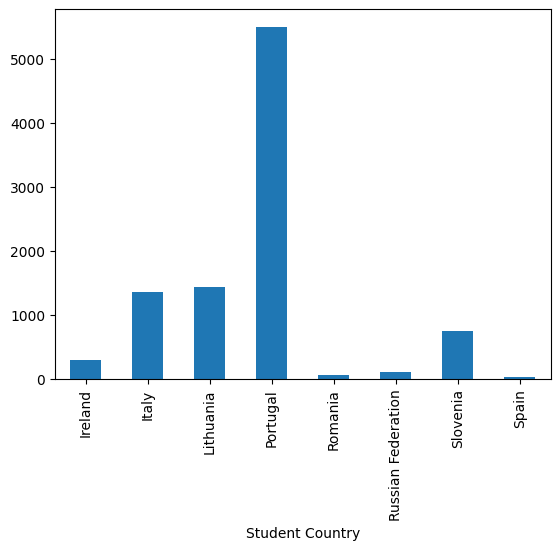

In [10]:
df.groupby('Student Country').size().plot(kind='bar')

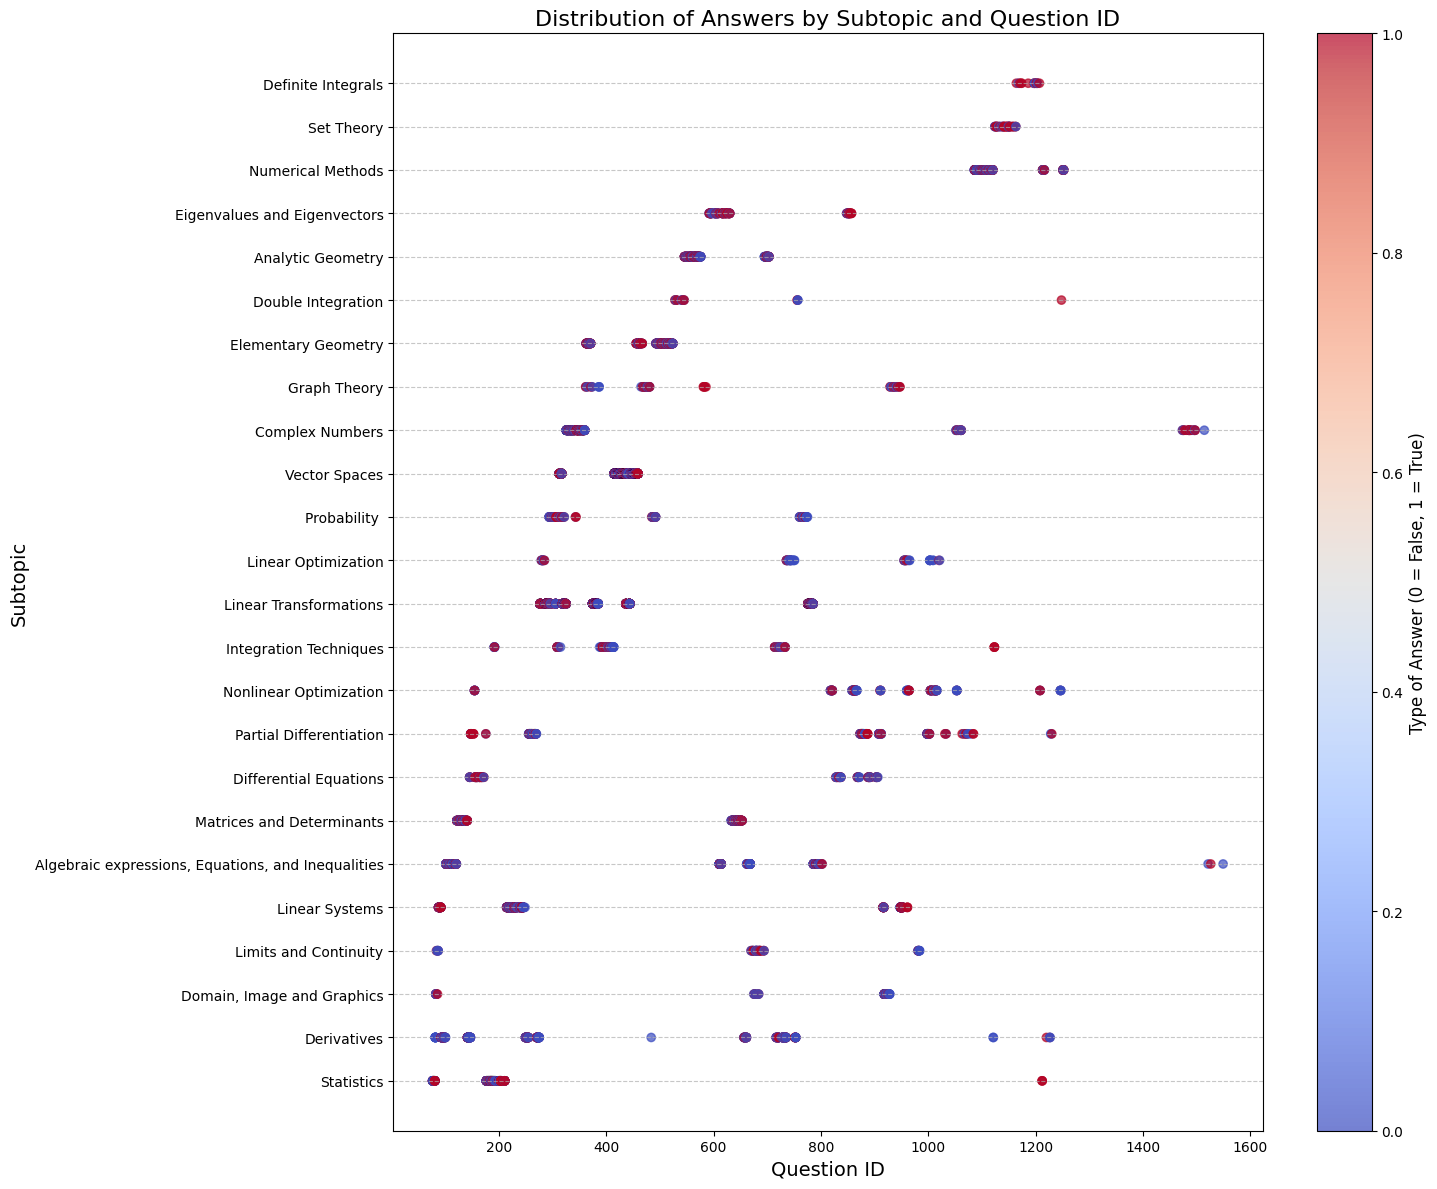

In [11]:
# Scatter plot with coloring based on the type of answer
plt.figure(figsize=(15, 12))
scatter = plt.scatter(
    df['Question ID'], 
    df['Subtopic'], 
    c=df['Type of Answer'], 
    cmap='coolwarm', 
    alpha=0.7
)

cbar = plt.colorbar(scatter)
cbar.set_label('Type of Answer (0 = False, 1 = True)', fontsize=12)
plt.xlabel('Question ID', fontsize=14)
plt.ylabel('Subtopic', fontsize=14)
plt.title('Distribution of Answers by Subtopic and Question ID', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Distribution of Answers by Subtopic and Question ID

The scatter plot below illustrates the distribution of answers across different subtopics in relation to the unique identifiers of each question.

- **X-Axis (Question ID)**: Represents the unique identifier for each question, indicating the sequence or grouping of questions in the dataset.  
- **Y-Axis (Subtopic)**: Displays the subtopics associated with the questions, categorizing them into specific areas of knowledge.  
- **Color Coding**: The color scale reflects the type of answer (`Type of Answer`), where red shades indicate correct answers (`1`), and blue shades indicate incorrect answers (`0`).  

This visualization helps identify patterns in the responses, such as specific clusters of questions that are more likely to be answered correctly or incorrectly within certain subtopics. It can be particularly useful for pinpointing challenging areas or understanding relationships between consecutive question IDs and their associated subtopics.


In [12]:
df.groupby(['Subtopic', 'Type of Answer'])['Type of Answer'].count()

Subtopic                                            Type of Answer
Algebraic expressions, Equations, and Inequalities  0                  304
                                                    1                  192
Analytic Geometry                                   0                  183
                                                    1                  175
Complex Numbers                                     0                  323
                                                    1                  269
Definite Integrals                                  0                    4
                                                    1                   11
Derivatives                                         0                  204
                                                    1                  113
Differential Equations                              0                   50
                                                    1                   58
Domain, Image and Graphics       

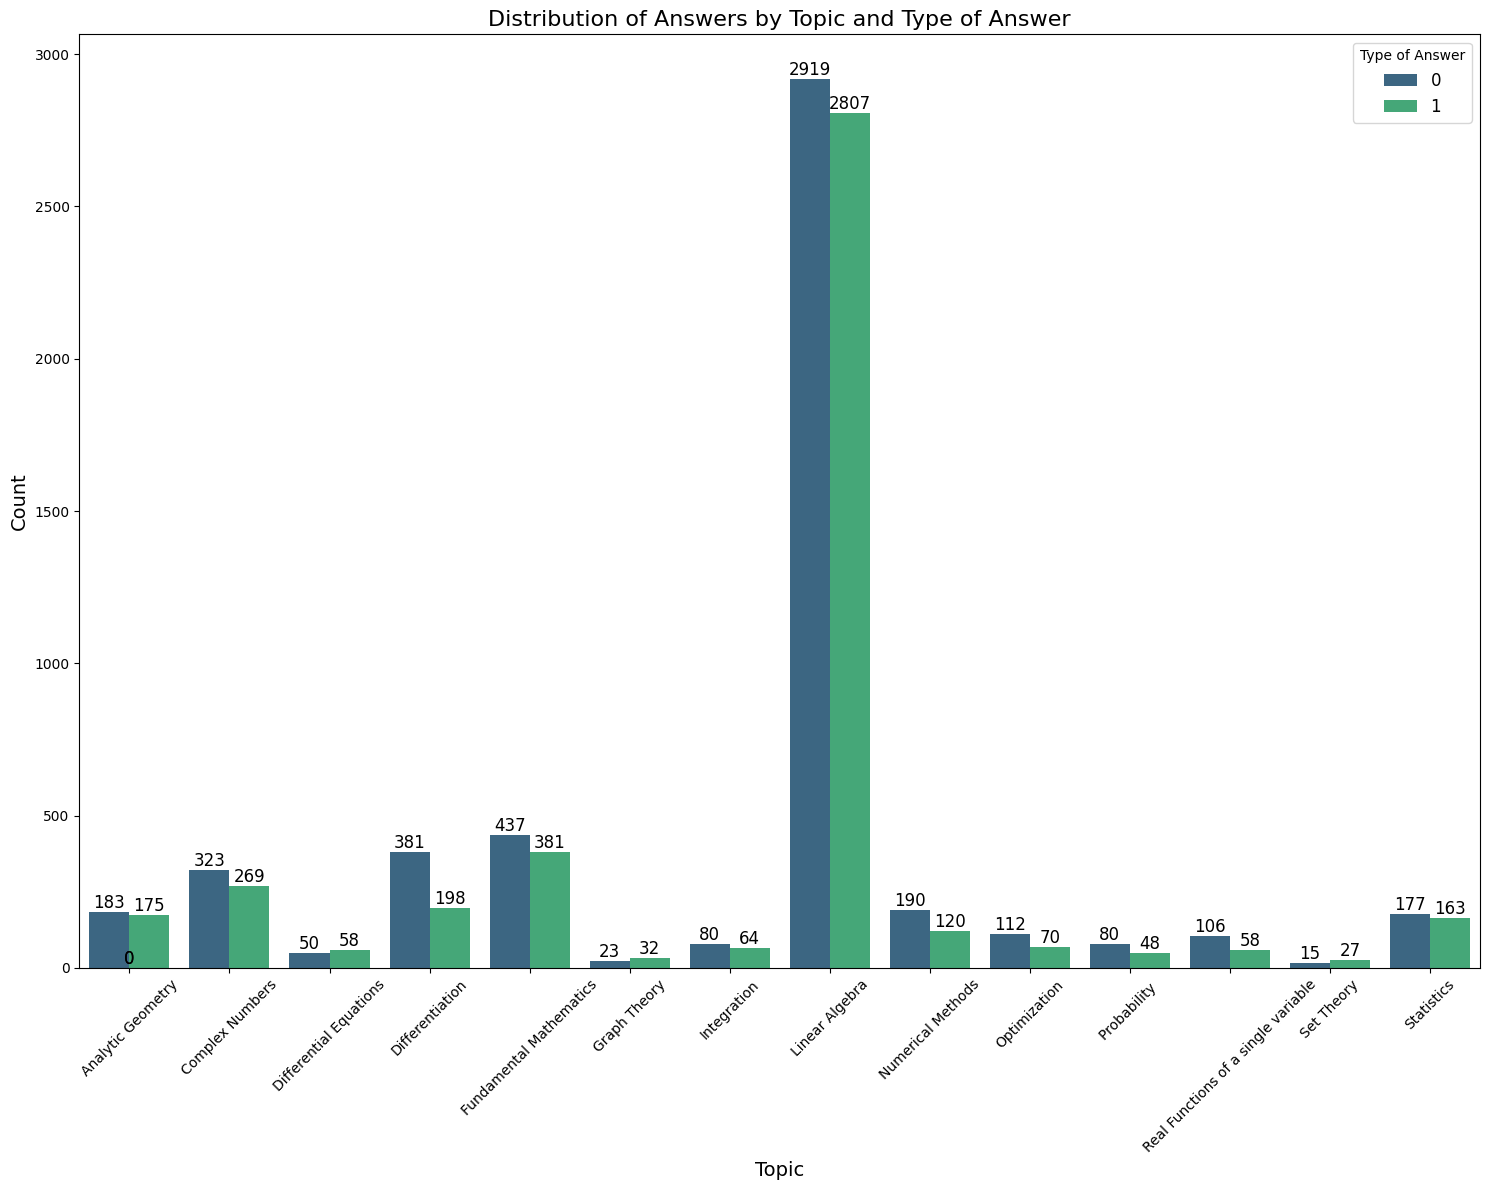

In [13]:
summary = df.groupby(['Topic', 'Type of Answer']).size().reset_index(name='Count')

plt.figure(figsize=(15, 12))
sns.barplot(data=summary, x='Topic', y='Count', hue='Type of Answer', palette='viridis')
plt.title('Distribution of Answers by Topic and Type of Answer', fontsize=16)
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Type of Answer', fontsize=12)
plt.xticks(rotation=45)
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

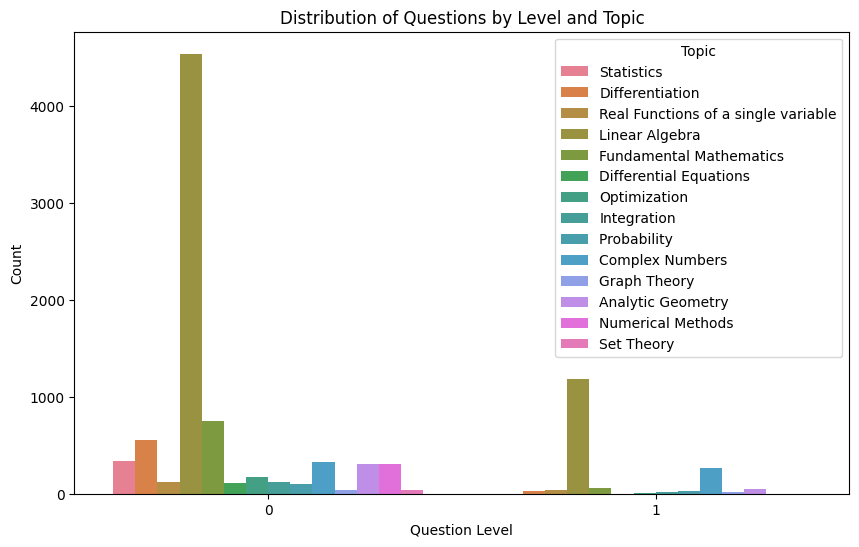

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Question Level', hue='Topic')
plt.title('Distribution of Questions by Level and Topic')
plt.xlabel('Question Level')
plt.ylabel('Count')
plt.legend(title='Topic')
plt.show()

numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, square=True,
            annot=True, fmt='.1f', linewidths=0.1, cmap='coolwarm');



In [15]:
df['Type of Answer'].value_counts()


Type of Answer
0    5076
1    4470
Name: count, dtype: int64

C:\Users\luisg\AppData\Local\Temp\ipykernel_12048\4244759740.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_scores, y='Topic', x='Type of Answer', palette='pastel')


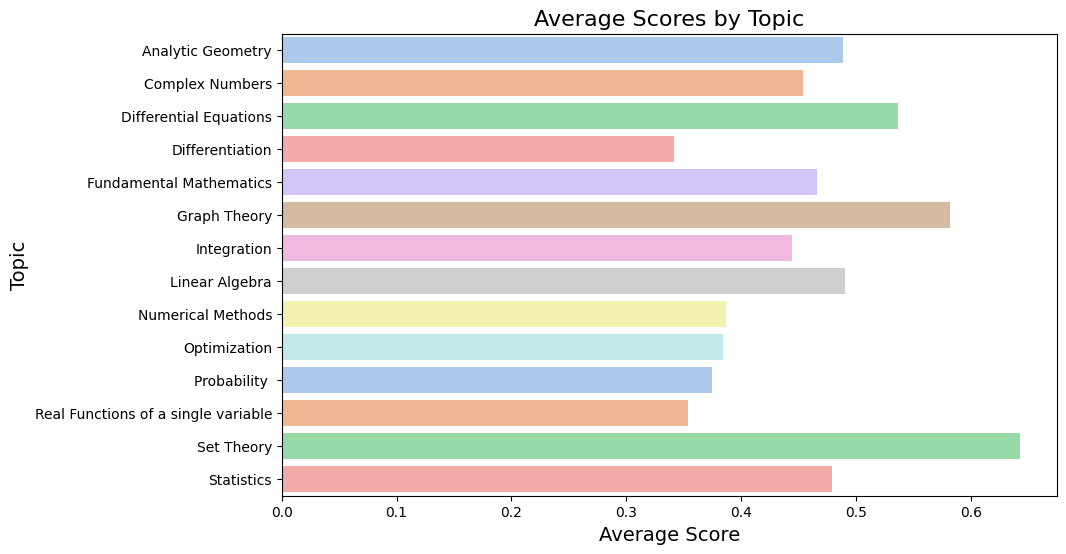

In [16]:
average_scores = df.groupby('Topic')['Type of Answer'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_scores, y='Topic', x='Type of Answer', palette='pastel')
plt.title('Average Scores by Topic', fontsize=16)
plt.ylabel('Topic', fontsize=14)
plt.xlabel('Average Score', fontsize=14)
plt.show()

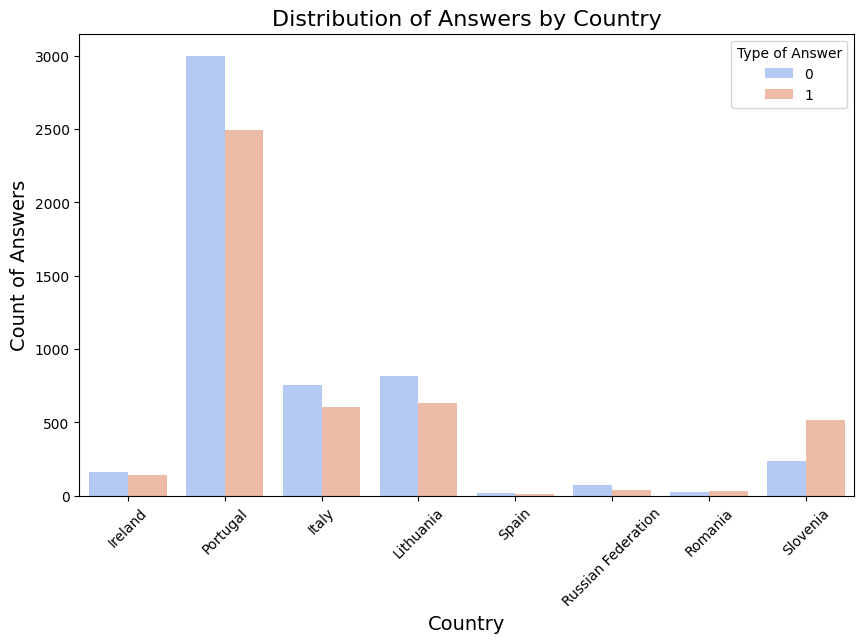

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Student Country', hue='Type of Answer', palette='coolwarm')
plt.title('Distribution of Answers by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count of Answers', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Type of Answer')
plt.show()

In [18]:
fig = px.histogram(df, x='Student Country', color='Topic',
                   title='Types of Answers by Student Countries with Topics and Question Levels',
                   labels={'Student Country': 'Student Country',
                           'count': 'Number of Answers',
                           'Topic': 'Topic'},
                   color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(
    width=1200,
    height=800,
    xaxis_title='Student Country',
    yaxis_title='Number of Answers',
    legend_title='Topic',
    barmode='group'
)
fig.update_traces(marker=dict(line=dict(width=1, color='black')), opacity=0.75)
fig.show()

In [19]:
# Split the DataFrame into training (70%) and remaining (30%)
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['Type of Answer'], random_state=42)

# Split the remaining data into validation (20% of total) and test (10% of total)
val_df, test_df = train_test_split(temp_df, test_size=1/3, stratify=temp_df['Type of Answer'], random_state=42)

# Display the sizes of the datasets with rounded proportions
print(f"Training set size: {len(train_df)} ({(len(train_df) / len(df)):.5f})")
print(f"Validation set size: {len(val_df)} ({(len(val_df) / len(df)):.5f})")
print(f"Test set size: {len(test_df)} ({(len(test_df) / len(df)):.5f})")

Training set size: 6682 (0.69998)
Validation set size: 1909 (0.19998)
Test set size: 955 (0.10004)


### Dataset Split Summary

This script divides the dataset into three subsets:

1. **Training Set (70%)**: Used to train the model.
2. **Validation Set (20%)**: Used to tune model parameters and prevent overfitting.
3. **Test Set (10%)**: Used to evaluate the model's performance on unseen data.

The splits are stratified based on the `'Type of Answer'` column to preserve class distribution across all subsets. The sizes of each subset and their proportions relative to the original dataset are also displayed.


In [20]:
X_train = train_df.drop(['Type of Answer', 'Student ID', 'Question ID'], axis=1)
y_train = train_df['Type of Answer']

X_val = val_df.drop(['Type of Answer', 'Student ID', 'Question ID'], axis=1)
y_val = val_df['Type of Answer']

X_test = test_df.drop(['Type of Answer', 'Student ID', 'Question ID'], axis=1)
y_test = test_df['Type of Answer']

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_val_encoded = encoder.transform(X_val[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Convert encoded arrays to DataFrames
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
X_val_encoded = pd.DataFrame(X_val_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_val.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)

# Concatenate encoded and numerical columns
X_train = pd.concat([X_train.drop(categorical_cols, axis=1), X_train_encoded], axis=1)
X_val = pd.concat([X_val.drop(categorical_cols, axis=1), X_val_encoded], axis=1)
X_test = pd.concat([X_test.drop(categorical_cols, axis=1), X_test_encoded], axis=1)

C:\Users\luisg\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros

C:\Users\luisg\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_encoders.py:228: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros



### Data Preparation for Machine Learning

1. **Separate Features and Target**  
   - The target variable is separated from the feature data.
   - Irrelevant columns are removed from the features.

2. **Identify Categorical Features**  
   - Columns with categorical data are identified for encoding.

3. **Apply One-Hot Encoding**  
   - Categorical features are transformed into numerical format using one-hot encoding.
   - The encoder is trained on the training set and applied consistently to validation and test sets to maintain uniform encoding.

4. **Combine Processed Features**  
   - Encoded categorical features are converted into DataFrames with appropriate column names and combined with the remaining numerical features.
   - The resulting datasets (training, validation, and test) are fully numeric and ready for input into machine learning models.

In [21]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    #"SVC": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
}


In [22]:
# import time
# # Define hyperparameter spaces based on literature recommendations
# param_grids = {
#    "Logistic Regression": [
#         {
#             "C": [0.01, 0.1, 1, 10],  # Focused on a narrower range of regularization strengths
#             "penalty": ["l2"],  # Commonly used and well-supported
#             "solver": ["lbfgs"],  # Efficient for L2 regularization
#             "max_iter": [500, 1000]  # Reasonable convergence limits
#         },
#         {
#             "C": [0.01, 0.1, 1, 10],  # Focused on a narrower range of regularization strengths
#             "penalty": ["l1"],  # Sparse solutions
#             "solver": ["liblinear"],  # Liblinear is optimized for L1
#             "max_iter": [500, 1000]  # Reasonable convergence limits
#         },
#         {
#             "C": [0.01, 0.1, 1, 10],  # Focused on a narrower range of regularization strengths
#             "penalty": ["elasticnet"],  # Combines L1 and L2
#             "solver": ["saga"],  # Only saga supports ElasticNet
#             "l1_ratio": [0.4, 0.6, 0.8],  # Focused on key combinations of L1 and L2
#             "max_iter": [500, 1000]  # Reasonable convergence limits
#         }
#     ],
#   "Random Forest": {
#         "n_estimators": [100, 200, 300],  # Increased estimators
#         "max_depth": [10, 20, 30],  # Expanded depth range
#         "min_samples_split": [2, 5],  # Common split thresholds
#         "min_samples_leaf": [1, 2],  # Leaf threshold
#         "bootstrap": [True]  # Common sampling strategy
#     },
#     "XGBoost": {
#         "n_estimators": [50, 100, 150],  # Expanded iterations
#         "max_depth": [3, 5, 7],  # Added a deeper option
#         "learning_rate": [0.05, 0.1, 0.2],  # Broader learning rates
#         "subsample": [0.8, 1.0],
#         "colsample_bytree": [0.8, 1.0]
#     },
#         "K-Nearest Neighbors": {
#         "n_neighbors": [3, 5, 10, 15, 20],  # Increased number of neighbors to include a wider range
#         "weights": ["uniform", "distance"],  # Retain both weighting options
#         "metric": ["euclidean", "manhattan", "minkowski"],  # Expanded metrics for distance calculation
#         "p": [1, 2]  # Applicable for Minkowski: 1 = Manhattan, 2 = Euclidean
#     },
#     #"SVC": {
#     #},
#      "Gradient Boosting": {
#     "n_estimators": [50, 100],  # Focused on fewer boosting rounds
#     "max_depth": [2, 5],  # Minimal depth to focus on generalization
#     "learning_rate": [0.01, 0.1],  # Key values for step size
#     },
#    "AdaBoost": {
#         "n_estimators": [100, 200],
#         "learning_rate": [0.1, 0.5],
#         "algorithm": ["SAMME", "SAMME.R"]
#     },
#      "Decision Tree": {
#         "criterion": ["gini", "entropy"],
#         "splitter": ["best", "random"],
#         "max_depth": [3, 5, 10, 20, None],
#         "min_samples_split": [2, 5, 10],
#         "min_samples_leaf": [1, 2, 4, 10]
#     },
#     "Naive Bayes": {},  # GaussianNB does not require hyperparameter tuning
# }

# # Define models
# models = {
#     "Logistic Regression": LogisticRegression(random_state=42),
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
#     "K-Nearest Neighbors": KNeighborsClassifier(),
#     #"SVC": SVC(probability=True, random_state=42),

#     "Gradient Boosting": GradientBoostingClassifier(random_state=42),
#     "AdaBoost": AdaBoostClassifier(random_state=42),
#     "Decision Tree": DecisionTreeClassifier(random_state=42),
#     "Naive Bayes": GaussianNB(),
# }

# # Perform hyperparameter tuning with timing
# best_params = {}
# tuning_times = {}
# for model_name, model in models.items():
#     print(f"\nTuning hyperparameters for: {model_name}...")
#     start_time = time.time()
#     grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring="accuracy", n_jobs=-1)
#     grid_search.fit(X_train, y_train)
#     best_params[model_name] = grid_search.best_params_
#     tuning_times[model_name] = time.time() - start_time
#     print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")
#     print(f"Time taken: {tuning_times[model_name]:.2f} seconds")

# # Save results
# with open("best_params.pkl", "wb") as f:
#     pickle.dump(best_params, f)


Starting training with the best hyperparameters for: Logistic Regression...

Training and evaluating the model: Logistic Regression...
Performance of Logistic Regression:
  Accuracy:  0.580
  Precision: 0.573
  Recall:    0.408
  F1 Score:  0.477
  ROC AUC:   0.590
--------------------------------------------------
Generating learning curve for: Logistic Regression...


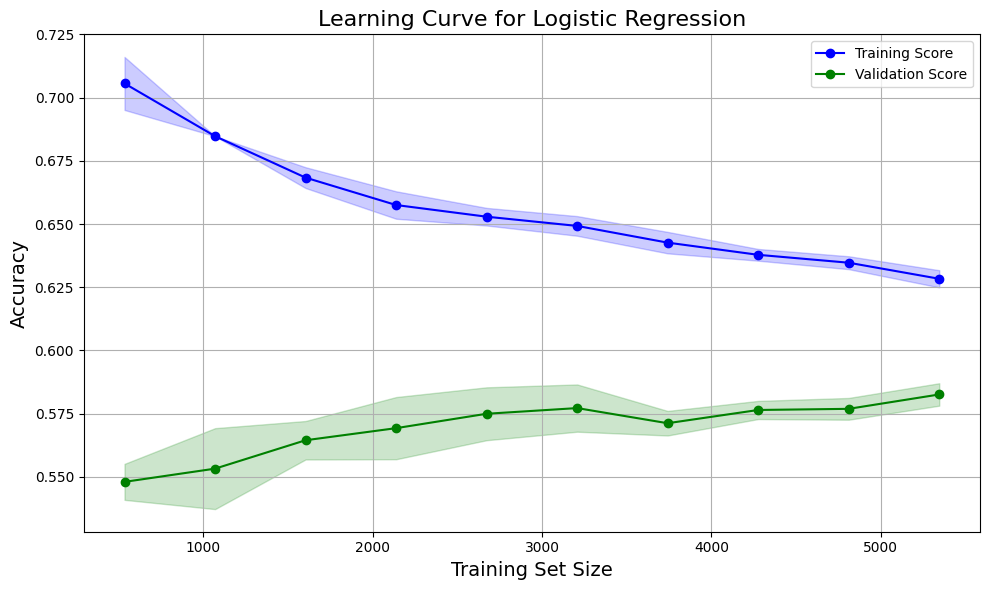


Starting training with the best hyperparameters for: Random Forest...

Training and evaluating the model: Random Forest...
Performance of Random Forest:
  Accuracy:  0.577
  Precision: 0.589
  Recall:    0.322
  F1 Score:  0.416
  ROC AUC:   0.602
--------------------------------------------------
Generating learning curve for: Random Forest...


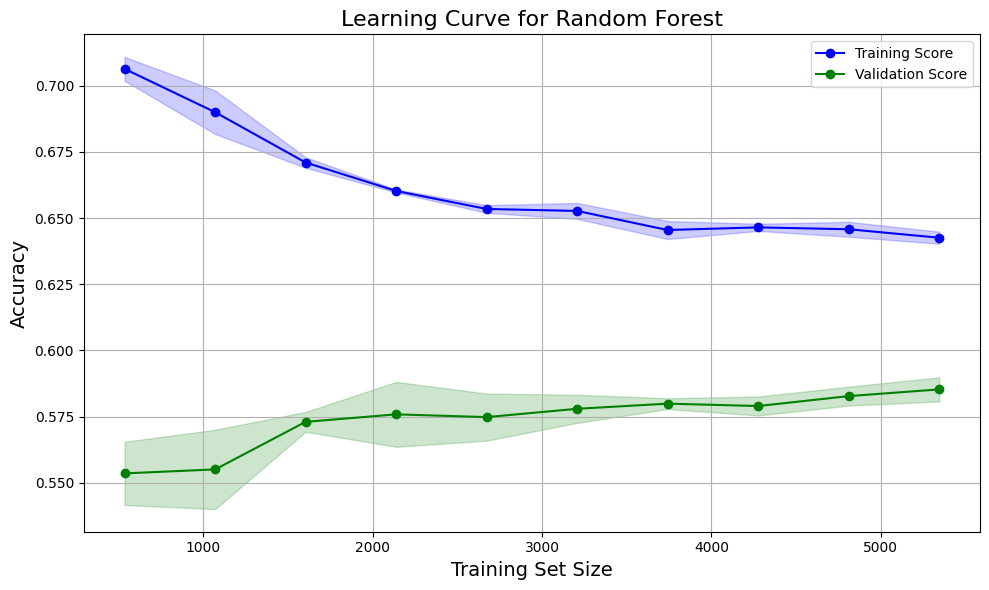


Starting training with the best hyperparameters for: XGBoost...

Training and evaluating the model: XGBoost...
Performance of XGBoost:
  Accuracy:  0.590
  Precision: 0.597
  Recall:    0.387
  F1 Score:  0.469
  ROC AUC:   0.608
--------------------------------------------------
Generating learning curve for: XGBoost...


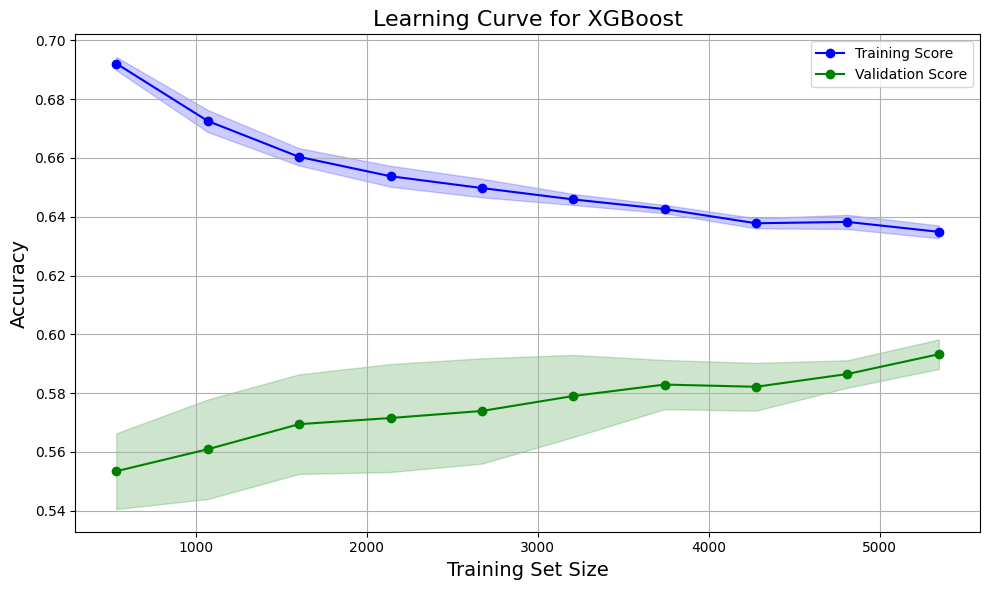


Starting training with the best hyperparameters for: K-Nearest Neighbors...

Training and evaluating the model: K-Nearest Neighbors...
Performance of K-Nearest Neighbors:
  Accuracy:  0.567
  Precision: 0.556
  Recall:    0.377
  F1 Score:  0.449
  ROC AUC:   0.585
--------------------------------------------------
Generating learning curve for: K-Nearest Neighbors...


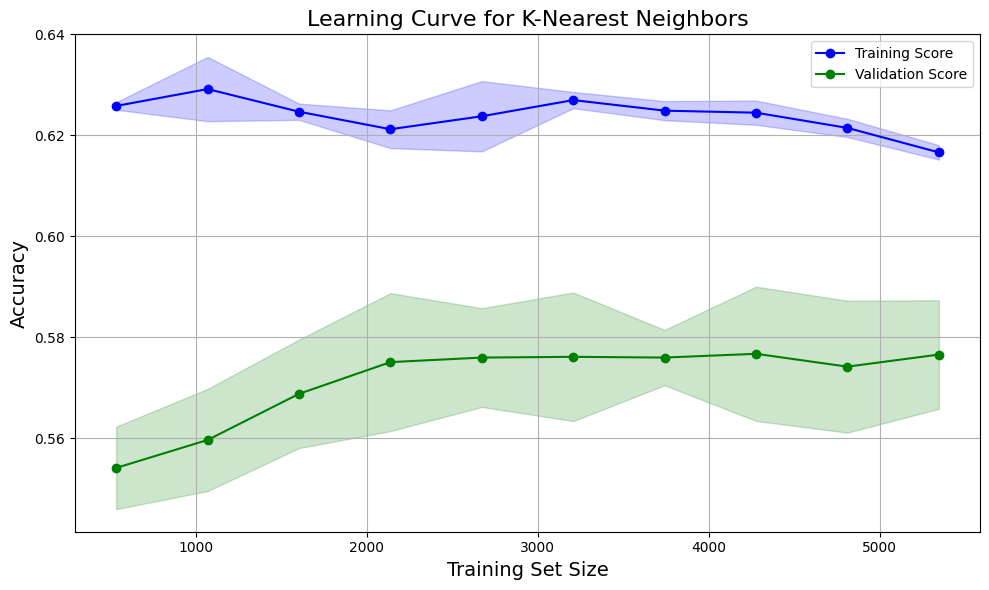


Starting training with the best hyperparameters for: Gradient Boosting...

Training and evaluating the model: Gradient Boosting...
Performance of Gradient Boosting:
  Accuracy:  0.576
  Precision: 0.608
  Recall:    0.264
  F1 Score:  0.368
  ROC AUC:   0.600
--------------------------------------------------
Generating learning curve for: Gradient Boosting...


KeyboardInterrupt: 

In [23]:
# # Load the best hyperparameters (if needed)
# with open("best_params.pkl", "rb") as f:
#     best_params = pickle.load(f)

# # Function to train, evaluate, and generate the learning curve
# def train_evaluate_and_plot(model, model_name, X_train, y_train, X_val, y_val):
#     print(f"\nTraining and evaluating the model: {model_name}...")
    
#     # Training
#     model.fit(X_train, y_train)
    
#     # Evaluation
#     y_val_pred = model.predict(X_val)
#     y_val_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

#     # Metrics
#     accuracy = accuracy_score(y_val, y_val_pred)
#     precision = precision_score(y_val, y_val_pred)
#     recall = recall_score(y_val, y_val_pred)
#     f1 = f1_score(y_val, y_val_pred)
#     roc_auc = roc_auc_score(y_val, y_val_proba) if y_val_proba is not None else "N/A"

#     # Display results
#     print(f"Performance of {model_name}:")
#     print(f"  Accuracy:  {accuracy:.3f}")
#     print(f"  Precision: {precision:.3f}")
#     print(f"  Recall:    {recall:.3f}")
#     print(f"  F1 Score:  {f1:.3f}")
#     print(f"  ROC AUC:   {roc_auc:.3f}" if roc_auc != "N/A" else f"  ROC AUC:   {roc_auc}")
#     print("-" * 50)

#     # Generate learning curve
#     print(f"Generating learning curve for: {model_name}...")
#     train_sizes, train_scores, val_scores = learning_curve(
#         model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
#     )
    
#     # Compute mean and standard deviation
#     train_mean = np.mean(train_scores, axis=1)
#     train_std = np.std(train_scores, axis=1)
#     val_mean = np.mean(val_scores, axis=1)
#     val_std = np.std(val_scores, axis=1)

#     # Plot the learning curve
#     plt.figure(figsize=(10, 6))
#     plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
#     plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
#     plt.plot(train_sizes, val_mean, label='Validation Score', color='green', marker='o')
#     plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color='green', alpha=0.2)
#     plt.title(f'Learning Curve for {model_name}', fontsize=16)
#     plt.xlabel('Training Set Size', fontsize=14)
#     plt.ylabel('Accuracy', fontsize=14)
#     plt.legend(loc='best')
#     plt.grid()
#     plt.tight_layout()
#     plt.show()

# # Train and evaluate each model with the best hyperparameters
# for model_name, model in models.items():
#     print(f"\nStarting training with the best hyperparameters for: {model_name}...")
#     model.set_params(**best_params[model_name])
#     train_evaluate_and_plot(model, model_name, X_train, y_train, X_val, y_val)


# Performance Metrics

---

## **1. Accuracy**

Accuracy measures the proportion of correct predictions out of the total predictions made.

$\text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Samples}}$


Accuracy is a good measure when the dataset is balanced (i.e., when the number of samples in each class is approximately equal).

However, it can be misleading for imbalanced datasets. For example, predicting the majority class always might result in high accuracy but poor performance overall.

---

## **2. Precision**
Precision calculates the proportion of correctly predicted positive samples out of all samples predicted as positive.


$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$

Precision is important when the cost of false positives is high. 

---

## **3. Recall (Sensitivity or True Positive Rate)**
Recall measures the proportion of correctly predicted positive samples out of all actual positive samples.


$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}$

Recall is important when the cost of false negatives is high.

---

## **4. F1 Score**
The F1 score is the harmonic mean of Precision and Recall, balancing the trade-off between the two metrics.

$\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

The F1 score is particularly useful when the dataset is imbalanced. It combines the benefits of both Precision and Recall into a single metric.

---

## **5. ROC AUC (Receiver Operating Characteristic - Area Under the Curve)**
ROC AUC measures the ability of the model to distinguish between classes. The curve plots the True Positive Rate (Recall) against the False Positive Rate (FPR) at different threshold values.

$\text{False Positive Rate} = \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}$

The Area Under the Curve (AUC) quantifies the overall performance:
- **AUC = 1.0:** Perfect model.
- **AUC = 0.5:** Random guessing.

---

## **6. Confusion Matrix**

The confusion matrix is a comprehensive tool to understand the performance of a classification model and calculate the above metrics.

|               | Predicted Positive | Predicted Negative |
|---------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)    | False Negative (FN)   |
| **Actual Negative** | False Positive (FP)   | True Negative (TN)    |

---




In [47]:
# # Define hyperparameter space
# max_depths = np.round(np.arange(1, 11, 1), 0)  # Tree depth
# learning_rates = np.round(np.arange(0.1, 0.7, 0.1), 3)  # Learning rates
# subsamples = np.round(np.arange(0.1, 1.1, 0.2), 3)  # Sampling
# lambdas = np.round(np.array([1, 5, 10, 15, 20, 30]), 3)  # L2 regularization
# colsample_bytree = np.round(np.arange(0.1, 1.1, 0.2), 3)  # Feature sampling per tree

# # Generate all hyperparameter combinations
# param_combinations = list(product(max_depths, learning_rates, subsamples, lambdas, colsample_bytree))

# # Prepare DMatrix for training and validation
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dvalidation = xgb.DMatrix(X_val, label=y_val)
# dtest = xgb.DMatrix(X_test, label=y_test)

# # Variables to store the best model
# best_model_params = None
# best_valid_logloss = float("inf")
# best_train_logloss = None

# # Loop to train the model with different hyperparameter combinations
# for max_depth, learning_rate, subsample, lambda_val, colsample_bytree in param_combinations:
#     # Define the hyperparameters for binary classification
#     params = {
#         'objective': 'binary:logistic',  # Binary classification
#         'eval_metric': 'logloss',  # Internal evaluation metric
#         'max_depth': int(max_depth),
#         'learning_rate': float(learning_rate),
#         'subsample': subsample,
#         'lambda': lambda_val,
#         'colsample_bytree': colsample_bytree,
#         'verbosity': 1
#     }
    
#     # Dictionary to store evaluation results
#     eval_results = {}
    
#     # Train the model using xgb.train
#     model = xgb.train(
#         params=params,
#         dtrain=dtrain,
#         evals=[(dtrain, 'train'), (dvalidation, 'validation')],
#         evals_result=eval_results,
#         verbose_eval=False,
#         num_boost_round=200,
#         early_stopping_rounds=10
#     )
    
#     # Get the best iteration and logloss
#     best_iteration = model.best_iteration
#     train_logloss = eval_results['train']['logloss'][best_iteration]
#     valid_logloss = eval_results['validation']['logloss'][best_iteration]
    
#     # Update the best model if necessary
#     if valid_logloss < best_valid_logloss:
#         best_valid_logloss = valid_logloss
#         best_train_logloss = train_logloss
#         best_eval_results = eval_results
#         best_model_params = params

# # Save the best model
# model.save_model("best_xgb_model.json")

# #Save evaluation results
# with open("best_eval_results.pkl", "wb") as f:
#    pickle.dump(best_eval_results, f)

# # Display the results of the best model
# print("Best Model:")
# print(f"  Hyperparameters: {best_model_params}")
# print(f"  Best Training Logloss: {best_train_logloss:.4f}")
# print(f"  Best Validation Logloss: {best_valid_logloss:.4f}")


In [48]:
eval_results = {}
model = xgb.Booster()
model.load_model("best_xgb_model.json")
# Load evaluation results
with open("best_eval_results.pkl", "rb") as f:
    best_eval_results = pickle.load(f)
best_iteration = model.best_iteration

# Prepare DMatrix for training and validation
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalidation = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)



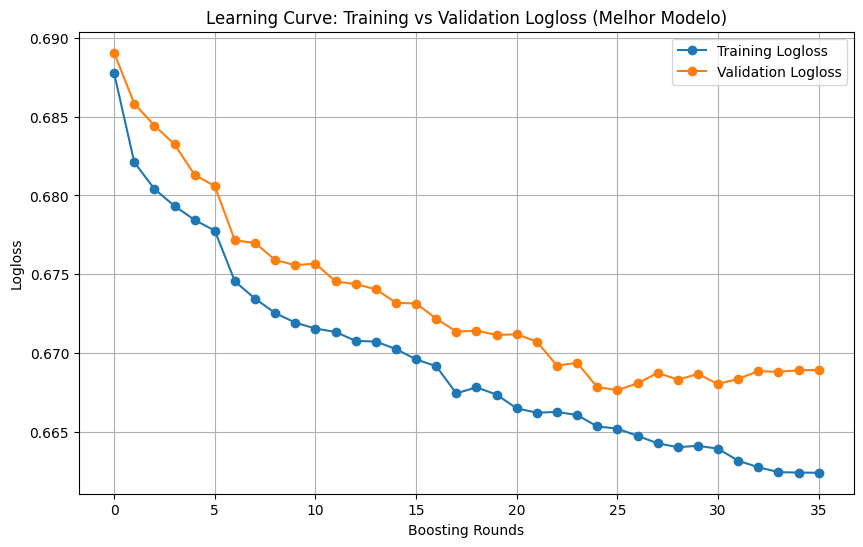

In [49]:
train_logloss = best_eval_results['train']['logloss']
validation_logloss = best_eval_results['validation']['logloss']

plt.figure(figsize=(10, 6))
plt.plot(range(len(train_logloss)), train_logloss, label='Training Logloss', marker='o')
plt.plot(range(len(validation_logloss)), validation_logloss, label='Validation Logloss', marker='o')
plt.title('Learning Curve: Training vs Validation Logloss (Melhor Modelo)')
plt.xlabel('Boosting Rounds')
plt.ylabel('Logloss')
plt.legend()
plt.grid()
plt.show()

#### Analysis of the Learning Curve: Training vs Validation Logloss

During the first few boosting rounds, both training and validation logloss decrease sharply, indicating effective learning and improvement.
The training logloss continuously decreases throughout all boosting rounds, showing the model fits the training data better over time.
The validation logloss decreases initially but flattens and begins to increase after approximately **25–30 boosting rounds**.
This trend suggests **overfitting**, where the model fits the training data well but struggles to generalize to unseen data.
A growing gap between the two curves highlights the model's tendency to memorize the training data rather than learning generalizable patterns.
After **25–30 boosting rounds**, additional iterations do not improve validation performance and may degrade it, suggesting the need for early stopping.




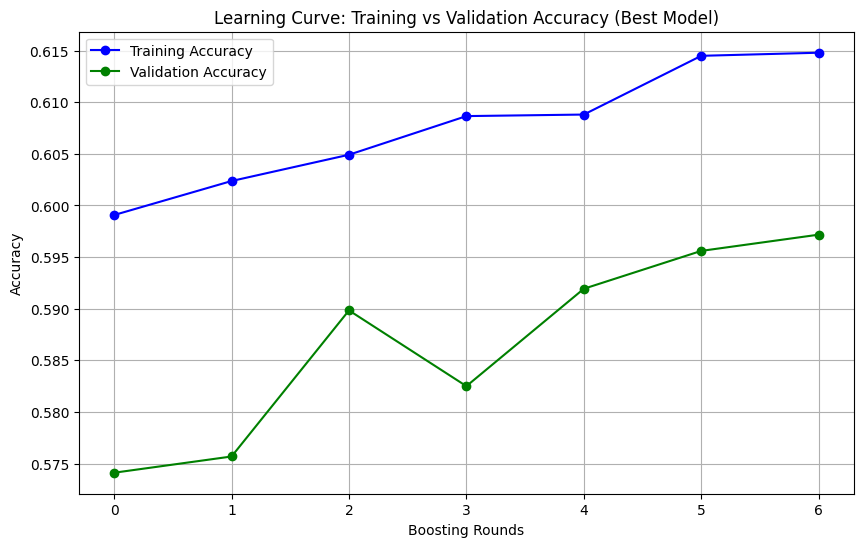

In [50]:
# Initialize lists to store accuracy per boosting round
train_accuracy_per_round = []
validation_accuracy_per_round = []

# Iterate through all boosting rounds
for i in range(best_iteration + 1):  # From 0 to the best iteration
    # Predictions for the training set at the current boosting round
    train_pred_proba_round = model.predict(dtrain, iteration_range=(0, i + 1))
    train_pred_round = (train_pred_proba_round > 0.5).astype(int)
    train_accuracy_per_round.append(accuracy_score(y_train, train_pred_round))

    # Predictions for the validation set at the current boosting round
    val_pred_proba_round = model.predict(dvalidation, iteration_range=(0, i + 1))
    val_pred_round = (val_pred_proba_round > 0.5).astype(int)
    validation_accuracy_per_round.append(accuracy_score(y_val, val_pred_round))
    
# Plotting the accuracy learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_accuracy_per_round)), train_accuracy_per_round, label='Training Accuracy', marker='o', color='blue')
plt.plot(range(len(validation_accuracy_per_round)), validation_accuracy_per_round, label='Validation Accuracy', marker='o', color='green')
plt.title('Learning Curve: Training vs Validation Accuracy (Best Model)')
plt.xlabel('Boosting Rounds')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

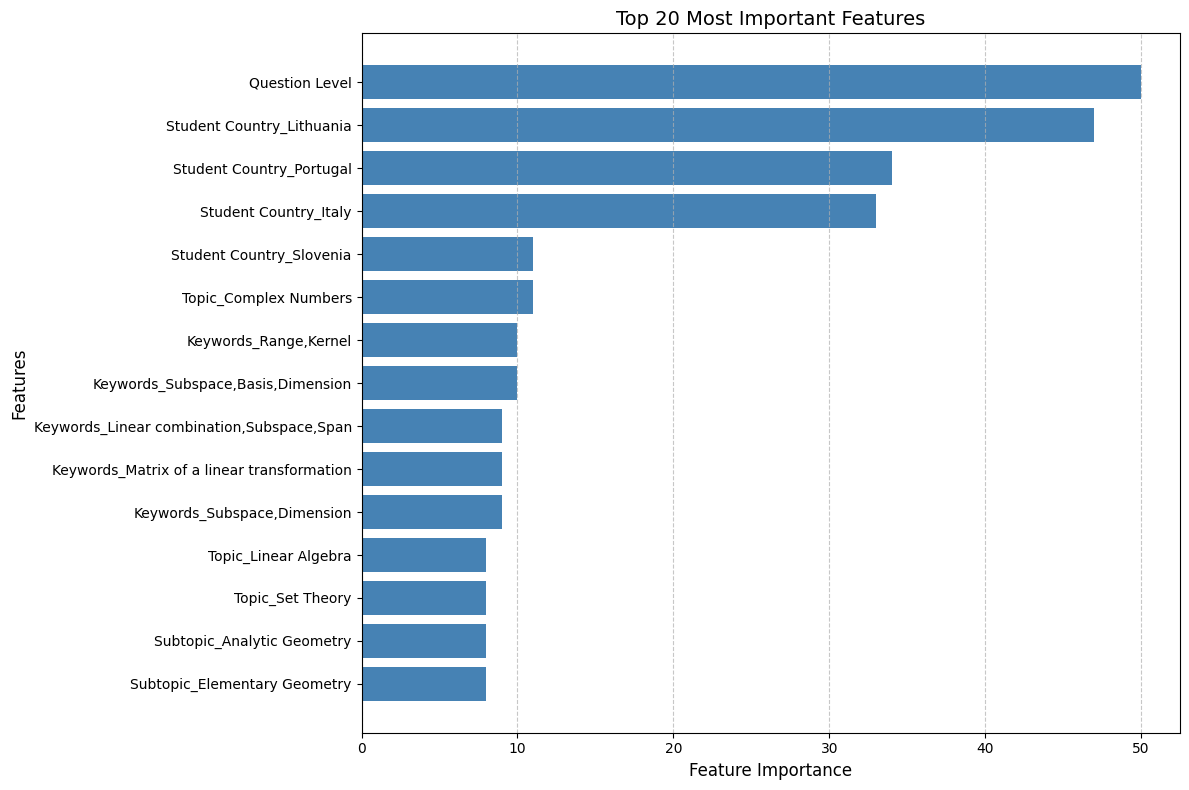

In [51]:
# Get feature importance
feature_importance = model.get_score(importance_type='weight')
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)  # Ordenar por importância

# Filter N features more important (e.g top 20)
top_n = 15
sorted_importance = sorted_importance[:top_n]

# Split names and values
feature_names = [item[0] for item in sorted_importance]
importance_values = [item[1] for item in sorted_importance]

plt.figure(figsize=(12, 8))  
plt.barh(feature_names, importance_values, color='steelblue')
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Top 20 Most Important Features", fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [52]:
# Predictions on the training set
train_pred_proba = model.predict(dtrain, iteration_range=(0, best_iteration + 1))  # Predict probabilities
train_pred = (train_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions
train_accuracy = accuracy_score(y_train, train_pred)  # Calculate accuracy

# Predictions on the validation set
val_pred_proba = model.predict(dvalidation, iteration_range=(0, best_iteration + 1))  # Predict probabilities
val_pred = (val_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions
val_accuracy = accuracy_score(y_val, val_pred)  # Calculate accuracy

# Predictions on the test set
test_pred_proba = model.predict(dtest, iteration_range=(0, best_iteration + 1))  # Predict probabilities
test_pred = (test_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions
test_accuracy = accuracy_score(y_test, test_pred)  # Calculate accuracy

# Display the accuracies
print(f"Accuracy on training set: {train_accuracy:.4f}")
print(f"Accuracy on validation set: {val_accuracy:.4f}")
print(f"Accuracy on test set: {test_accuracy:.4f}")


Accuracy on training set: 0.6148
Accuracy on validation set: 0.5972
Accuracy on test set: 0.5832


In [53]:
%timeit test_pred = model.predict(dtest, iteration_range = (0, model.best_iteration))

898 µs ± 25.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<Figure size 800x600 with 0 Axes>

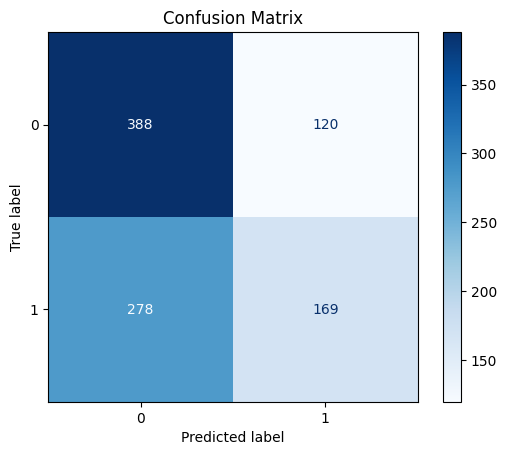

In [54]:
# Predictions
test_pred_proba = model.predict(dtest, iteration_range=(0, best_iteration + 1))
test_pred = (test_pred_proba > 0.5).astype(int)

cm = confusion_matrix(test_df['Type of Answer'], test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
disp.ax_.set_title("Confusion Matrix")
plt.show()

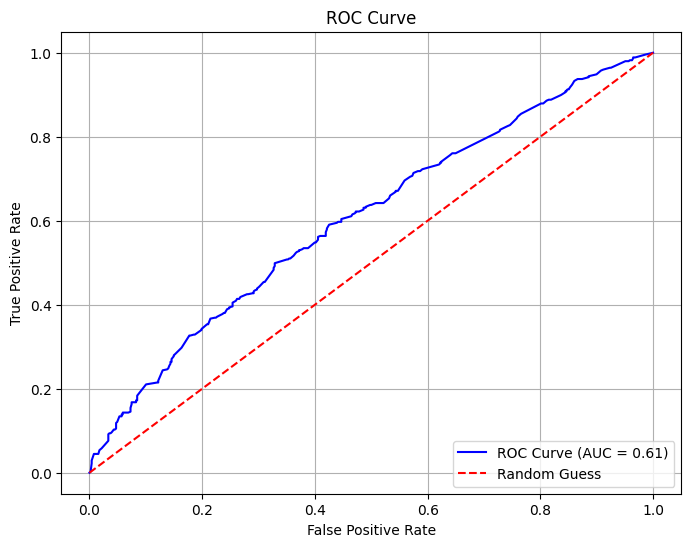

In [55]:
# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(test_df['Type of Answer'], test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### ROC Curve Analysis

The ROC curve shows the model's performance in distinguishing between classes, plotting the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity). 

- The model's AUC is **0.62**, slightly better than random guessing (AUC = 0.5).
- The ROC curve lies above the random guess line, indicating some predictive capability, but the model is far from optimal.
- Improve performance by further hyperparameter tuning, feature engineering, or trying alternative algorithms.


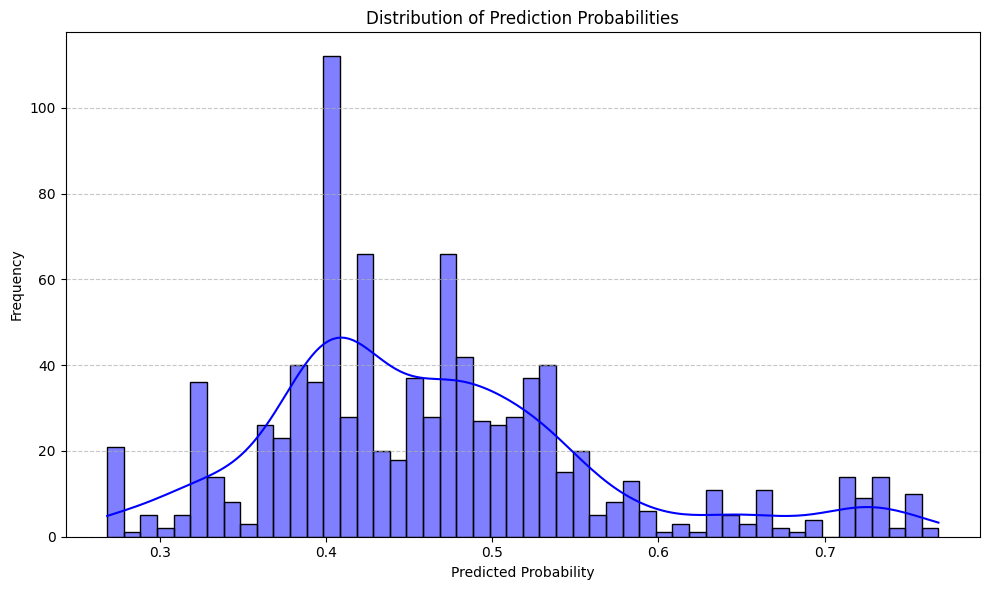

In [56]:
# 3. Prediction Probabilities Histogram
plt.figure(figsize=(10, 6))
sns.histplot(test_pred_proba, bins=50, kde=True, color='blue')
plt.title('Distribution of Prediction Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Distribution of Prediction Probabilities

- **Skewed Distribution:** The predicted probabilities are concentrated around **0.4**, suggesting the model has low confidence in distinguishing between classes.
- **Lack of High Certainty:** Few predictions approach probabilities closer to 0 or 1, which indicates the model struggles to make strong, confident classifications.



# Conclusion

The project's results highlight significant challenges in achieving high accuracy for the given task. After analyzing the performance metrics and learning curves across various models and hyperparameter configurations, it is clear that the lack of sufficient data is the primary limitation. The dataset's small size and limited variety hinder the models' ability to capture complex patterns and relationships effectively. Although underfitting is often associated with poorly trained or overly simple models, in this case, it is driven by the inherent limitations of the dataset itself.

Despite optimizing hyperparameters and experimenting with multiple algorithms, the models achieved only around 60% accuracy on the training set, which reflects the dataset's low potential. This poor performance demonstrates that the models are well-optimized but constrained by the insufficient data available. The gap between training and validation/test set performance further highlights the dataset's inability to support robust generalization. While overfitting is often linked to small datasets, here the issue remains underfitting because the data lacks the diversity required for the models to learn effectively.

The results emphasize the critical importance of acquiring more diverse and representative data to improve the model's ability to generalize and capture meaningful patterns. While the models achieved their maximum potential within the given constraints, the lack of data diversity imposes a ceiling on their performance. Addressing this limitation through the collection of additional real-world data is essential to enable the development of robust and accurate predictive models. Expanding the dataset would provide substantial potential to enhance generalization and improve accuracy significantly.


### Overfitting vs Underfitting in the Context of Lack of Data

In this project, our model achieved an accuracy of approximately 60% on the training set, which is indicative of poor overall performance. This suggests that the primary issue is **underfitting**, as the model is unable to capture sufficient patterns to perform better, even on the training data. However, it is important to note that the model has been well-optimized, meaning it is operating at its maximum potential given the current dataset. The core problem lies in the **limited potential** of the dataset itself, as the quantity and diversity of the available data are insufficient to allow the model to generalize effectively.

The distinction between overfitting and underfitting in the context of insufficient data is often misunderstood. While underfitting typically refers to models that are too simple or poorly trained, in this case, it is the dataset that limits the model's ability to perform better. Overfitting, in contrast, occurs when a model memorizes the limited data it has, leading to high training accuracy but poor validation and test performance. Here, the dataset's lack of diversity prevents overfitting from being a significant risk, as there is not enough information for the model to memorize.

In conclusion, our results highlight the challenge of working with insufficient data. Although the model is well-optimized, the lack of data imposes a ceiling on its performance, resulting in underfitting and suboptimal accuracy. This emphasizes the importance of acquiring more diverse and representative data to unlock the model's full potential and improve its generalization capabilities.



References:

https://xgboost.readthedocs.io/en/stable/python/python_api.html

https://www.datacamp.com/pt/tutorial/types-of-data-plots-and-how-to-create-them-in-python